# Machine Learning Project

## Introduction

After taking the Data Science course from BrainStation, I learned how powerful python and its libraries in data analysis, prediction and visualization. In order to strengen my skills in algorithm development, I decided to take a step further to continue and deep dive into Machine Learning. 

Currently I am at the 3rd week of the course and planning on my project, it took me a while to decide a topic as I tried to avoid having repetitive skills as used in Data Science course. I learned that there are various stages of Data Science and Machine Learning:
 - Data collection
 - Data sorting
 - Data analysis
 - Algorithm development
 - Apply and optimize algorithm
 - Utilize the results geneterated from the algorithm to provide insights and further conclusions

In order to apply all the above skills and use all sort of machine learning APIs more extensively including sci-kit learn, TensorFlow and Keras, and furthermore I will deploy the ML model to real-time data in Google Cloud Platform. I have done research and read feedback on suggested projects, and decided to proceed with analyzing Real and Fake news. Data was taken from Kaggle and the project is in progress. I will constantly upload the noteboook for updates, so stay tuned!

## Data Collection

**Data Source:** Data is collected from Kaggle https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

There are 2 sets of data - **True.csv** and **Fake.csv**, which consists of ~20,000 and ~18,000 articles, respectively. Each dataset contains the following information:

 - Article Title
 - Article Test
 - Article Subject
 - Article published date

Data was cleaned and uploaded to Kaggle by the creator prior to downloading for analysis 

## Import Libraries and Data

In [82]:
# import libraries
# more libraries will be imported as I go

# libraries for data processing and data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

%matplotlib inline

# visual representation of text data
from wordcloud import WordCloud, STOPWORDS

# Natural Language Processing Tool Kit Imports
# Importing Natural Language ToolKit and its essential packages
import nltk

# Removing stopwords
from nltk.corpus import stopwords 

# libraries for machine learning


# Traing and Test splits prior to data modelling
from sklearn.model_selection import train_test_split

# Various models for data modelling
from sklearn.linear_model import LinearRegression

# Model Scoring
from sklearn.metrics import accuracy_score

In [107]:
# import data
true = pd.read_csv('data/True.csv')
true.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [108]:
fake = pd.read_csv('data/Fake.csv')
fake.tail()

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


## Exploratory data analysis

#### Create a copy of both DataFrames to avoid changes of the original DataFrames, followed by exploring DataFrames details

In [109]:
df_true = true.copy()

In [110]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [111]:
df_true.nunique()

title      20826
text       21192
subject        2
date         716
dtype: int64

In [112]:
df_true['subject'].unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [113]:
df_fake = fake.copy()

In [114]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [115]:
df_fake.nunique()

title      17903
text       17455
subject        6
date        1681
dtype: int64

In [116]:
df_fake['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

#### Data cleanup on the subject column to make it more readible and for consistency

In [117]:
# change the content in subject column for consistency: create dictionary and assign to the column

# For Ture News
true_subject_clean = {'politicsNews' : 'Political News',\
                        'worldnews' : 'World News'}

df_true['subject'] = df_true['subject'].map(true_subject_clean)

# For Fake News
fake_subject_clean = {'politics' : 'Political News',\
                        'Government News' : 'Government News',\
                        'News' : 'News',\
                        'left-news' : 'Left News',\
                        'US_News' : 'US News',\
                        'Middle-east' : 'Middle Eastern News'}

df_fake['subject'] = df_fake['subject'].map(fake_subject_clean)

#### Data cleanup to check duplicates and drop if any

In [118]:
df_true.duplicated().sum()

206

In [119]:
df_fake.duplicated().sum()

3

#### Add "category" to True and Fake DataFrame, this will be used for categorization and classification in data modelling

In [120]:
# add new column "label", True will be 1, and Fake will be 0

df_true['category'] = 1
df_fake['category'] = 0

In [121]:
# concat and create a new DataFrame for both df_true and df_fake

df_tf = pd.concat([df_true, df_fake])
df_tf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44898 non-null  object
 1   text      44898 non-null  object
 2   subject   44898 non-null  object
 3   date      44898 non-null  object
 4   category  44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [122]:
df_tf.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,Political News,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,Political News,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,Political News,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,Political News,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,Political News,"December 29, 2017",1


In [123]:
df_tf.subject.value_counts()

Political News         18113
World News             10145
News                    9050
Left News               4459
Government News         1570
US News                  783
Middle Eastern News      778
Name: subject, dtype: int64

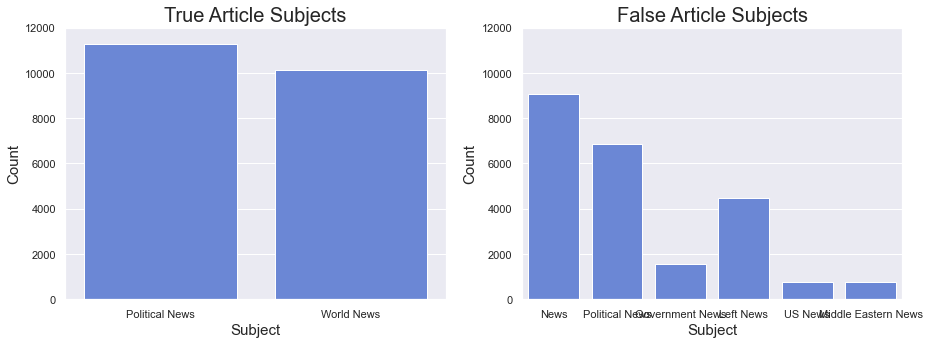

In [139]:
plt.subplots(1,2, figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='subject', data=df_true, color='#597FE7')
plt.title('True Article Subjects',fontsize = 20)
plt.xlabel('Subject',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.ylim([0, 12000])

plt.subplot(1,2,2)
sns.countplot(x='subject', data=df_fake, color='#597FE7')
plt.title('False Article Subjects',fontsize = 20)
plt.xlabel('Subject',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.ylim([0, 12000]);

**Stopwords**

Stopwords are the English words which does not add much meaning to a sentence, and that they can be filtered without sacrificing the meaning of the original sentences. Words or punctuation such as 'the', 'he' or 'have' will be excluded. This step is usually done before or after processing of natural language data

**WordCloud**

Word Cloud is a data visualization tool to represent the word frequency and importance based on the font size - it is a technique commonly used for analyzing text data from social media websites.

I used the following website to assist me in setting the syntax: https://www.geeksforgeeks.org/generating-word-cloud-python/

**To get a better sense of the common words that were seen or used in the News title and text**

note that I would like to do a WordCloud analysis of text as well, however it was computational heavy and I had a hard time running

In [141]:
# WordClouds for words in Titles for df_true
# Setting up or stopwords 
stopwords = set(STOPWORDS)

# Creating a list of words 
words_df_true_title = ''

# Iterating over every word in our column
for word in df_true['title']:

# Iterate over text and split it
    word = word.split()
    
    # Converting each word into lowercase using a for loop
    for i in range(len(word)):
                   word[i] = word[i].lower()
                   words_df_true_title += " ".join(word)+" "

# Intializing a Word Cloud 
wc_df_true_title = WordCloud(width = 500,
                                   height = 500,
                                   background_color = 'black',
                                   stopwords = stopwords).generate(words_df_true_title)

In [140]:
# WordClouds for words in Titles for df_fake
# Setting up or stopwords 
stopwords = set(STOPWORDS)

# Creating a list of words 
words_df_fake_title = ''

# Iterating over every word in our column
for word in df_fake['title']:

# Iterate over text and split it
    word = word.split()
    
    # Converting each word into lowercase using a for loop
    for i in range(len(word)):
                   word[i] = word[i].lower()
                   words_df_fake_title += " ".join(word)+" "

# Intializing a Word Cloud 
wc_df_fake_title = WordCloud(width = 500,
                                   height = 500,
                                   background_color = 'black',
                                   stopwords = stopwords).generate(words_df_fake_title)

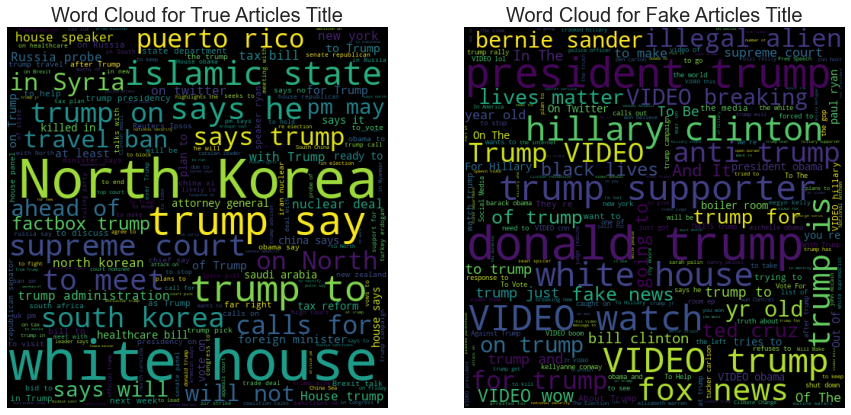

In [142]:
# plot the WordCloud image for News Title
# a good resource to guide doing subplot 
# https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html

plt.subplots(1,2, figsize = (15,15))

# WordCloud for True News DataFrame
plt.subplot(1,2,1)
plt.imshow(wc_df_true_title)
plt.title('Word Cloud for True Articles Title', fontsize = 20)
plt.axis('off')

# WordCloud for Fake News DataFrame
plt.subplot(1,2,2)
plt.imshow(wc_df_fake_title)
plt.title('Word Cloud for Fake Articles Title', fontsize = 20)
plt.axis('off')


plt.show()